In this notebook we build a simple auotencoder for Mnist data, and show how to use it for anomaly detection.

In [20]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Both the encoder and the decoder arejust composed by a couple of dense layers.
The latent dimension is 16. This means that each input is reduced from an initial dimensions of 28*28=784 to a an internal dimension of just 16 floats.

Most of the relevant information is preserved, as testified by the fact that we are able to reconstruct, out of this 16 values, an image very similar to the original one.

In [21]:
encoding_dim = 16
mid_dim = 64

# Input Layer (784 = 28x28 MNIST image flattened)
input_img = layers.Input(shape=(784,))

# Encoder
encoded = layers.Dense(mid_dim, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(mid_dim, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)


In [22]:
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,328 (403.62 KB)

 Trainable params: 103,328 (403.62 KB)

 Non-trainable params: 0 (0.00 B)

Input Layer: Accepts flattened 28x28 pixel grayscale image.

***Encoder***:
- First Dense Layer (64 neurons, ReLU): Learns higher-level features.

- Second Dense Layer (16 neurons, ReLU): This is the bottleneck/latent representation — your compressed encoding.

***Decoder***:

- First Dense Layer (64 neurons, ReLU): Begins reconstructing from latent features.

- Output Dense Layer (784 neurons, Sigmoid): Reconstructs the image with pixel values between 0 and 1 (due to sigmoid).

Autoencoder Model: Maps original input to its reconstruction.



We can now compile the model.

As loss function we can take mse or categorical crossentropy, as you prefer.

In [23]:
adam = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=adam, loss='mse')

We now load the datatet, and normalize  it in the range [0,1]. We are not using labels.

In [24]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Time to fit the model. Observe that the ground truth we need to compare with is in this case the input itself. In other words, the loss is the distance between the inout $X$ and its reconstruction $\hat{X}$

In [25]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1030 - val_loss: 0.0418
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0389 - val_loss: 0.0308
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0297 - val_loss: 0.0261
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0259 - val_loss: 0.0237
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0237 - val_loss: 0.0222
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0225 - val_loss: 0.0215
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0217 - val_loss: 0.0209
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0212 - val_loss: 0.0205
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0200 - val_loss: 0.0195
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Let us check the result.

First of all we conpute all reconstructions for images in the test set.

In [26]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Now we can plot the result. We pick ten random images, and for each of them we show the original and the reconstruction obtained from the autoencoder.

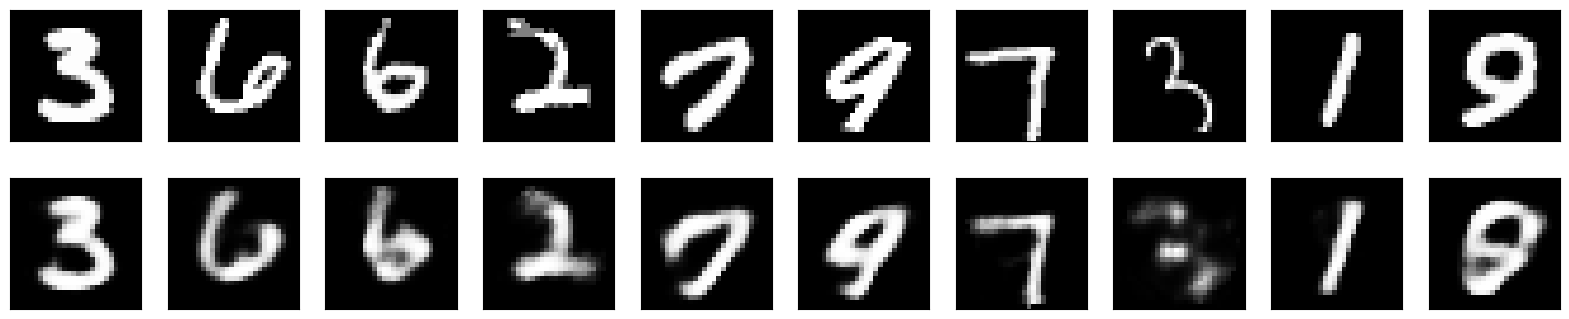

In [27]:
import matplotlib.pyplot as plt

n = 10 #no images to plot
imgs = np.random.randint(low=0,high=10000,size=n)
plt.figure(figsize=(20, 4))
for (i,idx) in enumerate(imgs):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Anomaly detection

We want now to show how we **can use an autoencoder for anomaly detection**.

The general idea is that the **encoding learned by the autoenoder is data-specific**. This means that if we apply the autoencoder to an **outlier**, the resulting reconstruction should be **sensibily worse than usual**, and we may exploit this simple fact to **detect the anomaly**.

The first step of the procedure is to identify the canonical expected reconstruction error on true data, and the associated standard deviation.

In [35]:
mse = np.mean(np.square(decoded_imgs - x_test),axis=1) #mean error for each input
#this will be an array of size (10000,)
#print first 5
print(mse.shape)
mse = np.mean(mse)
std = np.std(mse)
print(np.mean(mse))
print(np.std(mse))

(10000,)
0.017911205
0.0


Now we create an "anomaly". We simply take a normal image from the dataset, and rotate it of 90 degrees.

For this example, we use image no 15 in the test set.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0320
0.03201897069811821


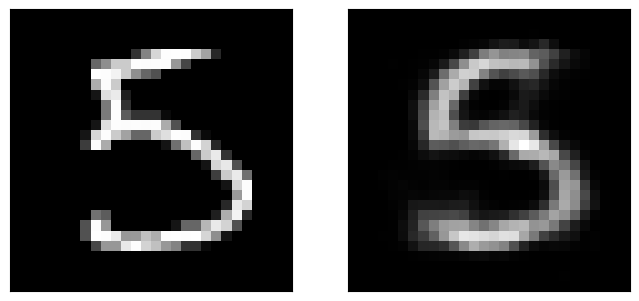

In [36]:
test = x_test[15].reshape(1,784)
print(autoencoder.evaluate(test,test))

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test[15].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[15].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('lyar1.jpg')
plt.show()

Observe that the reconstruction is not particularly good, but still the loss (0.207) is more or less on std away from the mean, that is a normal behaviour.

Now, let us rotate it and repeat the computation.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


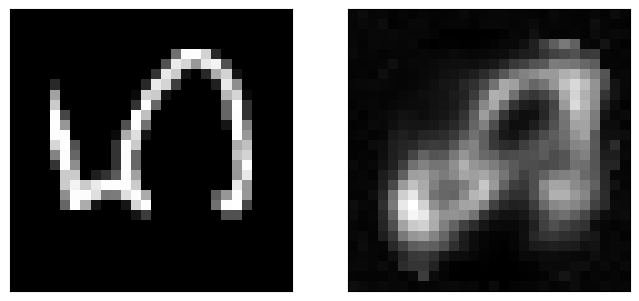

In [30]:
rotated = np.rot90(x_test[15].reshape(28,28))
predicted = autoencoder.predict(rotated.reshape(1,784))[0].reshape(28,28)

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(rotated)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(predicted)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('lyar2.jpg')
plt.show()

In [31]:
mse = np.mean(np.square(predicted-rotated))
print("mse is {}".format(mse))

mse is 0.05553833395242691


The mse in this case is 0.052, more than 3 std away form the mean, that is surely an anomaly!!

Let us finally observe that, instead of using mean and variance of reconstruction errors, we could have directly worked in the latent space.

In fact, autoencoders generalize Principal Component Ananlysis, extracting relevant, non linear combinations of the input features. Any anomaly will
sensibibly discost from canonical values of the latent encoding.